In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

DATA_DIR = Path("..") / "data"
df = pd.read_csv(DATA_DIR / "curated" / "exoplanets_curated.csv")

df.head()

,planet_id,planet_name,star_name,disc_year,disc_method,distance_ly,radius_earth,mass_earth,orbital_period_days,eq_temp_k,notes,density_rel_earth,density_g_cm3,class_size
0,1,Kepler-22b,Kepler-22,2011.0,Transit,600.0,2.40,5.30,289.90,295.0,NaN,0.383391,2.112486,Giant
1,2,TRAPPIST-1b,TRAPPIST-1,2016.0,Transit,39.5,1.09,0.85,1.51,400.0,NaN,0.656356,3.616521,Earth-Like
2,3,TRAPPIST-1c,Trappist-1,2016.0,Transit,39.5,1.06,0.62,2.42,NaN,missing temp,0.520564,2.868307,Earth-Like
3,4,TRAPPIST-1d,TRAPPIST-1,2016.0,Transit,39.5,0.77,0.41,4.05,282.0,NaN,0.898073,4.948383,Sub-Earth
4,5,Gliese 667 Cc,Gliese 667 C,2011.0,Radial Velocity,23.6,1.60,3.80,28.10,277.0,possibly habitable,0.927734,5.111816,Super-Earth


In [6]:
discoveries_by_year = (
    df.groupby("disc_year")
        .size()
        .reset_index(name = "count")
        .sort_values("disc_year")
)
discoveries_by_year.head()

,disc_year,count
0,2005.0,1
1,2007.0,2
2,2008.0,1
3,2011.0,4
4,2012.0,1


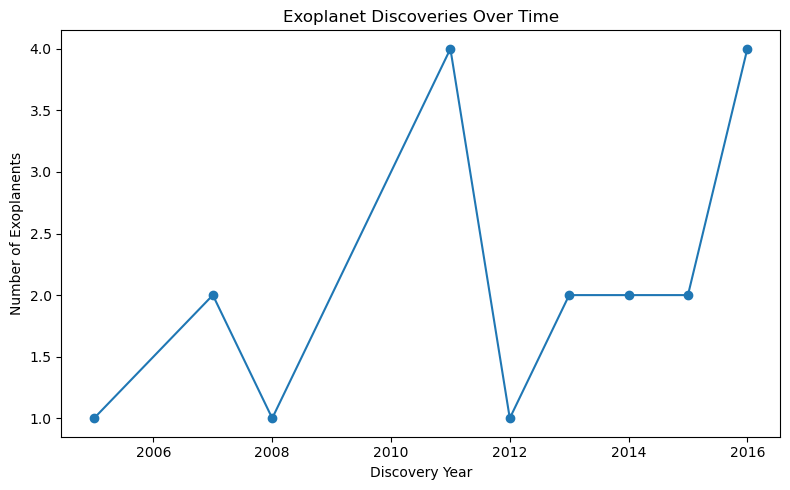

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(
    discoveries_by_year["disc_year"],
    discoveries_by_year["count"],
    marker="o"
)

plt.title("Exoplanet Discoveries Over Time")
plt.xlabel("Discovery Year")
plt.ylabel("Number of Exoplanents")

plt.tight_layout()
plt.show()

In [12]:
PLOTS_DIR = Path("..") / "plots"
PLOTS_DIR.mkdir(exist_ok = True)

plt.figure(figsize=(8, 5))
plt.plot(
    discoveries_by_year["disc_year"],
    discoveries_by_year["count"],
    marker="o"
)

plt.title("Exoplanet Discoveries Over Time")
plt.xlabel("Discovery Year")
plt.ylabel("Number of Exoplanets")
plt.tight_layout()

#Save the plot
plt.savefig(PLOTS_DIR / "discoveries_by_year.png")
plt.close()

In [15]:
#the second plot will be the number of planets per classs size
df["class_size"].value_counts()

class_size
Super-Earth    7
Giant          6
Earth-Like     6
Sub-Earth      1
Name: count, dtype: int64

In [17]:
size_counts = (
    df
    .groupby("class_size")
    .size()
    .reset_index(name="count")
)
size_counts
    

,class_size,count
0,Earth-Like,6
1,Giant,6
2,Sub-Earth,1
3,Super-Earth,7


In [19]:
order = [
    "Sub-Earth",
    "Earth-Like",
    "Super-Earth",
    "Giant"
]

size_counts["class_size"] = pd.Categorical(
    size_counts["class_size"],
    categories=order,
    ordered=True
)

size_counts = size_counts.sort_values("class_size")
size_counts

,class_size,count
2,Sub-Earth,1
0,Earth-Like,6
3,Super-Earth,7
1,Giant,6


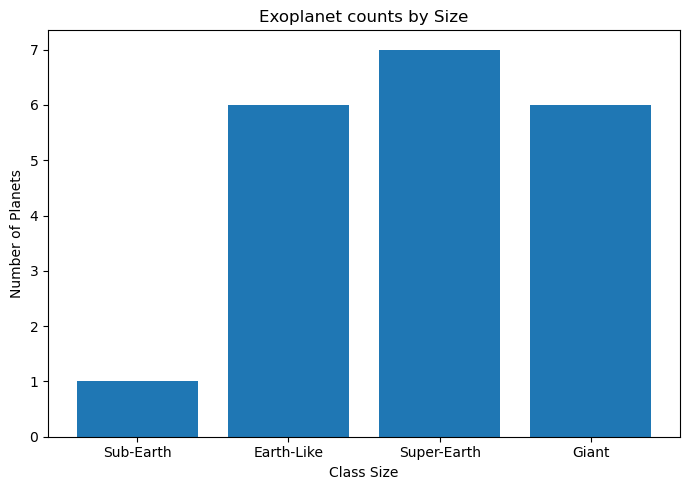

In [22]:
plt.figure(figsize=(7, 5))
plt.bar(
    size_counts["class_size"],
    size_counts["count"]
)

plt.title("Exoplanet Counts by Size")
plt.xlabel("Class Size")
plt.ylabel("Number of Planets")

plt.tight_layout()
plt.show()

In [23]:
plt.figure(figsize=(7, 5))
plt.bar(
    size_counts["class_size"],
    size_counts["count"]
)

plt.title("Exoplanet Counts by Size")
plt.xlabel("Class Size")
plt.ylabel("Number of Planets")

plt.tight_layout()

plt.savefig(PLOTS_DIR / "counts_by_size_class.png")
plt.close()

In [24]:
#distribution of planet radii
df["radius_earth"].describe()

count    20.000000
mean      1.688500
std       0.614023
min       0.770000
25%       1.132500
50%       1.600000
75%       2.150000
max       3.000000
Name: radius_earth, dtype: float64

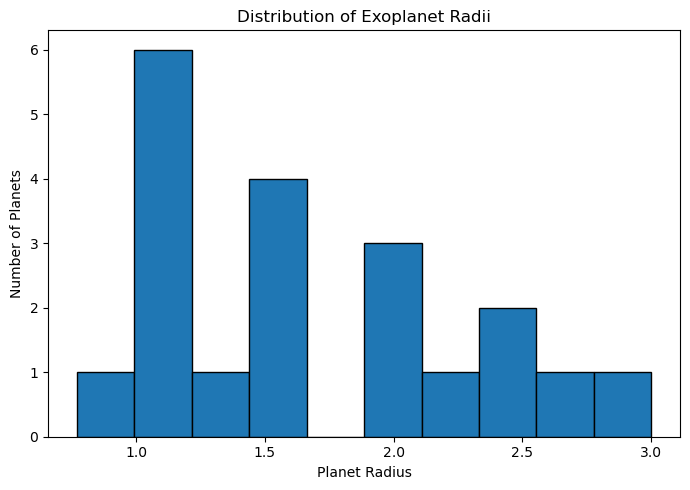

In [25]:
plt.figure(figsize=(7, 5))
plt.hist(
    df["radius_earth"],
    bins=10,
    edgecolor="black"
)

plt.title("Distribution of Exoplanet Radii")
plt.xlabel("Planet Radius")
plt.ylabel("Number of Planets")

plt.tight_layout()
plt.show()

In [27]:
plt.figure(figsize=(7, 5))
plt.hist(
    df["radius_earth"],
    bins=10,
    edgecolor="black"
)

plt.title("Distribution of Exoplanet Radii")
plt.xlabel("Planet Radius")
plt.ylabel("Number of Planets")

plt.tight_layout()

plt.savefig(PLOTS_DIR / "radius_distribution.png")
plt.close()

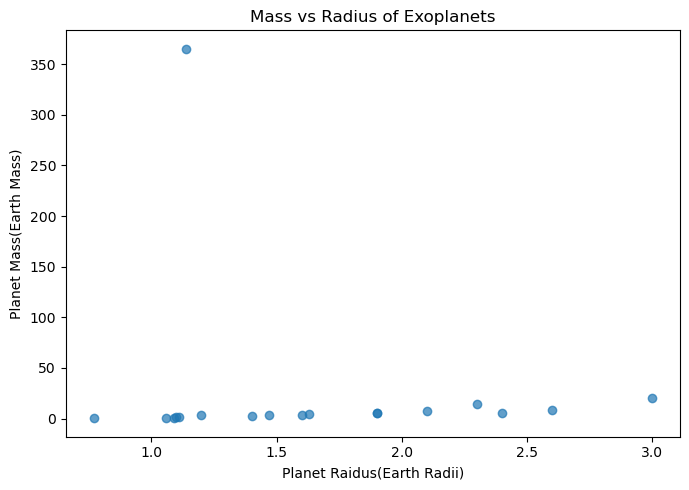

In [30]:
#mass vs radius

#scatter plot cannot plot NaNs
scatter_df = df[["radius_earth", "mass_earth"]].dropna()

plt.figure(figsize=(7, 5))
plt.scatter(
    scatter_df["radius_earth"],
    scatter_df["mass_earth"],
    alpha=0.7
)

plt.title("Mass vs Radius of Exoplanets")
plt.xlabel("Planet Raidus(Earth Radii)")
plt.ylabel("Planet Mass(Earth Mass)")

plt.tight_layout()
plt.show()


In [32]:
plt.figure(figsize=(7, 5))
plt.scatter(
    scatter_df["radius_earth"],
    scatter_df["mass_earth"],
    alpha=0.7
)

plt.title("Mass vs Radius of Exoplanets")
plt.xlabel("Planet Raidus(Earth Radii)")
plt.ylabel("Planet Mass(Earth Mass)")

plt.tight_layout()

plt.savefig(PLOTS_DIR / "mass_vs_radius.png")
plt.close()

In [33]:
df.sort_values("mass_earth", ascending=False).head()

,planet_id,planet_name,star_name,disc_year,disc_method,distance_ly,radius_earth,mass_earth,orbital_period_days,eq_temp_k,notes,density_rel_earth,density_g_cm3,class_size
14,15,WASP-12b,WASP-12,2008.0,Transit,1400.0,NaN,450.0,1.1,2500.0,negative radius error,NaN,NaN,NaN
13,14,HD 189733 b,HD 189733,2005.0,Transit,63.0,1.14,365.0,2.2,1200.0,hot Jupiter,NaN,NaN,Earth-Like
17,18,Imaginary-1,Imaginary Star,NaN,Transit,99999.0,3.00,20.0,365.0,288.0,future discovery year,0.740741,4.081481,Giant
16,17,Kepler-10c,Kepler-10,2014.0,Transit,560.0,2.30,14.0,45.3,584.0,mega-Earth,1.150653,6.340100,Giant
10,11,K2-18b,K2-18,2015.0,Transit,124.0,2.60,8.6,32.9,NaN,water vapor detected,0.489304,2.696063,Giant
